In [1]:
import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    data = list(parse(path))
    df = pd.json_normalize(data, 'questions', ['asin'])
    return df

# Replace 'QA_Beauty.json.gz' with the actual path to your Gzip-compressed JSON file
df = getDF('QA_Beauty.json.gz')

# Display the DataFrame
print(df)

      questionType         askerID       questionTime  \
0       open-ended  A3VTSR929E3J0R  December 26, 2013   
1       open-ended  A1LZ5DJ7AJYAXD     April 26, 2014   
2           yes/no  A1ER8W5FAQM6G5      July 11, 2014   
3       open-ended  A1P403R4I7LVPU  December 20, 2013   
4       open-ended  A166KM8A5H1Z2O  February 26, 2014   
...            ...             ...                ...   
32931       yes/no  A164SPHD6JR4L0       July 2, 2014   
32932       yes/no  A3LMNODD16O8J6       July 2, 2014   
32933       yes/no  A13S7ZT69W96HR       July 2, 2014   
32934   open-ended   A1HHOCBWVDXSE       July 2, 2014   
32935   open-ended  A1ZJ90GJNNH2EK       July 2, 2014   

                                            questionText  \
0      May I request for a manual instruction on this...   
1      Having problems with the heater melting the wa...   
2      How much wax (in pounds, for instance) does it...   
3          How to know the expired date of this product?   
4      I am not

In [2]:
df['questionText'].loc[15]

'is it disposable or washable'

In [3]:
df['answers'].loc[15]

[{'answerText': 'Disposable',
  'answererID': 'A3S1T7RY1E26I4',
  'answerTime': 'November 2, 2014',
  'helpful': [0, 0]},
 {'answerText': 'Disposable',
  'answererID': 'A45EACYIGJGXE',
  'answerTime': 'November 2, 2014',
  'helpful': [0, 0]},
 {'answerText': 'They are disposable.',
  'answererID': 'A6N66F6V9U1S0',
  'answerTime': 'November 2, 2014',
  'helpful': [0, 0]}]

In [4]:
import pandas as pd

# Assuming 'answerScore' is the column representing the answer score
threshold_score = 0.8

# Define a function to filter answers based on the threshold score
def filter_answers(answers):
    return [answer for answer in answers if float(answer.get('answerScore', 0)) > threshold_score]

# Apply the filtering function to the 'answers' column
df['filtered_answers'] = df['answers'].apply(filter_answers)

# Create a new DataFrame with relevant columns
filtered_df = df[['questionText', 'filtered_answers']].copy()

# Display the resulting DataFrame with filtered answers
print(filtered_df)


                                            questionText  \
0      May I request for a manual instruction on this...   
1      Having problems with the heater melting the wa...   
2      How much wax (in pounds, for instance) does it...   
3          How to know the expired date of this product?   
4      I am not in the sun as I work inside. I am new...   
...                                                  ...   
32931              is Argan Oil Pure 100% good for Skin?   
32932  I find myself with rough cuticles right around...   
32933                        is it good for nail beauty?   
32934      how can i use it for Topical Use on Dry Hair?   
32935    how can i use it for Deep Conditioning Session?   

                                        filtered_answers  
0                                                     []  
1                                                     []  
2                                                     []  
3                                          

In [ ]:
df

In [5]:
# Assuming 'answerScore' is the column representing the answer score
threshold_score = 0.5

# Define a function to filter answers based on the threshold score
def filter_answers(answers):
    return [answer for answer in answers if float(answer.get('answerScore', 0)) > threshold_score]

# Apply the filtering function to the 'answers' column
df['filtered_answers'] = df['answers'].apply(filter_answers)

# Print the resulting DataFrame with filtered answers
print(df[['questionText', 'filtered_answers']])


                                            questionText  \
0      May I request for a manual instruction on this...   
1      Having problems with the heater melting the wa...   
2      How much wax (in pounds, for instance) does it...   
3          How to know the expired date of this product?   
4      I am not in the sun as I work inside. I am new...   
...                                                  ...   
32931              is Argan Oil Pure 100% good for Skin?   
32932  I find myself with rough cuticles right around...   
32933                        is it good for nail beauty?   
32934      how can i use it for Topical Use on Dry Hair?   
32935    how can i use it for Deep Conditioning Session?   

                                        filtered_answers  
0                                                     []  
1                                                     []  
2      [{'answerText': 'It came with the proper amoun...  
3                                          

In [6]:
# Get the total sum of NaN values in the entire DataFrame
total_nan_sum = df.isnull().sum()

# Print the total sum of NaN values
print(total_nan_sum)


questionType        0
askerID             0
questionTime        0
questionText        0
answers             0
asin                0
filtered_answers    0
dtype: int64


In [7]:
# Filter rows with both a question and non-empty answers
filtered_row = df.loc[1]  
if filtered_row['questionText'] and filtered_row['answers']:
    print(filtered_row[['questionText', 'answers']])



questionText    Having problems with the heater melting the wa...
answers         [{'answerText': 'I leave the unit on all the t...
Name: 1, dtype: object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32936 entries, 0 to 32935
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   questionType      32936 non-null  object
 1   askerID           32936 non-null  object
 2   questionTime      32936 non-null  object
 3   questionText      32936 non-null  object
 4   answers           32936 non-null  object
 5   asin              32936 non-null  object
 6   filtered_answers  32936 non-null  object
dtypes: object(7)
memory usage: 1.8+ MB


In [9]:
#checking for missing values 
df.isnull().sum()

questionType        0
askerID             0
questionTime        0
questionText        0
answers             0
asin                0
filtered_answers    0
dtype: int64

In [10]:
df.describe()

questionType         askerID    questionTime  \
count         32936           32936           32936   
unique            2           25236            1062   
top      open-ended  A2QE9FT13SXK92  April 16, 2014   
freq          28380              45             112   

                     questionText  \
count                       32936   
unique                      27048   
top     What are the ingredients?   
freq                           52   

                                                  answers        asin  \
count                                               32936       32936   
unique                                              28217        5857   
top     [{'answerText': 'NL L72.', 'answererID': 'A2T9...  B000XJ0PG2   
freq                                                   44          10   

       filtered_answers  
count             32936  
unique             3531  
top                  []  
freq              28859

# Data analysis 

In [11]:
df['questionType'].value_counts()

questionType
open-ended    28380
yes/no         4556
Name: count, dtype: int64

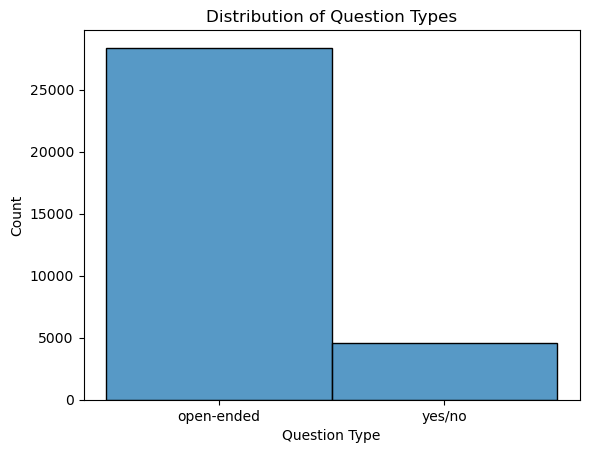

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'questionType' is a categorical variable
sns.histplot(df['questionType'])
plt.title('Distribution of Question Types')
plt.xlabel('Question Type')
plt.ylabel('Count')
plt.show()


In [13]:
df['asin'].value_counts()

asin
B000XJ0PG2    10
B00B1M0XCG    10
B00H1M8QZG    10
B00BMVNMTM    10
B001TJXI6Y    10
              ..
B006YEDCAG     1
B004A6YI4Y     1
B009K2V3P0     1
B00FG0VHGU     1
B00ABV3RHQ     1
Name: count, Length: 5857, dtype: int64

In [14]:
unique_values = df['asin'].unique()
print(unique_values)

['B000050FES' 'B000052YQ2' 'B0000532I0' ... 'B00JFJR4OW' 'B00JOSEHTO'
 'B00L5JHZJO']


In [15]:
unique_values = df['questionType'].unique()
print(unique_values)


['open-ended' 'yes/no']


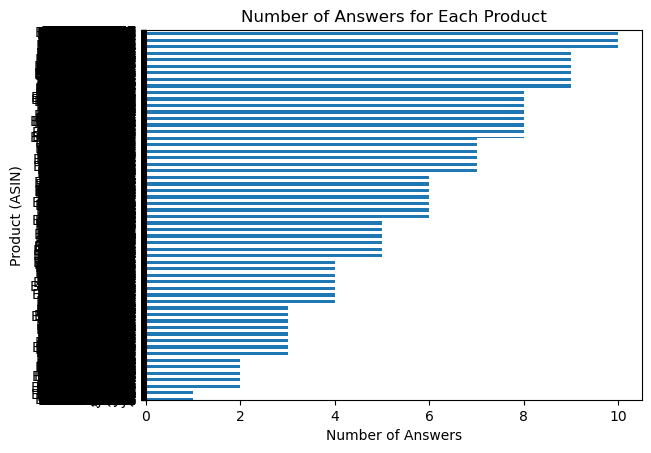

In [16]:
# Plot the distribution of answer counts for each product
df.groupby('asin')['answers'].apply(lambda x: len(x)).sort_values().plot(kind='barh')
plt.title('Number of Answers for Each Product')
plt.xlabel('Number of Answers')
plt.ylabel('Product (ASIN)')
plt.show()


In [17]:
import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    data = list(parse(path))
    df = pd.json_normalize(data, 'questions', ['asin'])
    return df

# Replace 'QA_Beauty.json.gz' with the actual path to your Gzip-compressed JSON file
df = getDF('QA_Beauty.json.gz')


# Display the DataFrame
df




questionType         askerID       questionTime  \
0       open-ended  A3VTSR929E3J0R  December 26, 2013   
1       open-ended  A1LZ5DJ7AJYAXD     April 26, 2014   
2           yes/no  A1ER8W5FAQM6G5      July 11, 2014   
3       open-ended  A1P403R4I7LVPU  December 20, 2013   
4       open-ended  A166KM8A5H1Z2O  February 26, 2014   
...            ...             ...                ...   
32931       yes/no  A164SPHD6JR4L0       July 2, 2014   
32932       yes/no  A3LMNODD16O8J6       July 2, 2014   
32933       yes/no  A13S7ZT69W96HR       July 2, 2014   
32934   open-ended   A1HHOCBWVDXSE       July 2, 2014   
32935   open-ended  A1ZJ90GJNNH2EK       July 2, 2014   

                                            questionText  \
0      May I request for a manual instruction on this...   
1      Having problems with the heater melting the wa...   
2      How much wax (in pounds, for instance) does it...   
3          How to know the expired date of this product?   
4      I am not in the sun as I work inside. I am new...   
...                                                  ...   
32931              is Argan Oil Pure 100% good for Skin?   
32932  I find myself with rough cuticles right around...   
32933                        is it good for nail beauty?   
32934      how can i use it for Topical Use on Dry Hair?   
32935    how can i use it for Deep Conditioning Session?   

                                                 answers        asin  
0      [{'answerText': 'Homedics has a complete list ...  B000050FES  
1      [{'answerText': 'I leave the unit on all the t...  B000050FES  
2      [{'answerText': 'It came with the proper amoun...  B000050FES  
3      [{'answerText': 'The expiration date is on the...  B000052YQ2  
4      [{'answerText': 'This product is awesome. I do...  B000052YQ2  
...                                                  ...         ...  
32931  [{'answerText': 'I really like it.  It is a no...  B00L5JHZJO  
32932  [{'answerText': 'Yes, you can. In the evening ...  B00L5JHZJO  
32933  [{'answerText': 'I would say it's good for cut...  B00L5JHZJO  
32934  [{'answerText': 'A little goes a long way!  A ...  B00L5JHZJO  
32935  [{'answerText': 'You can use it as a pre-shamp...  B00L5JHZJO  

[32936 rows x 6 columns]

In [18]:
# Drop the 'questionTime' column
df1 = df.drop(columns=['questionTime'])

# Display the DataFrame after dropping 'questionTime'
df1


questionType         askerID  \
0       open-ended  A3VTSR929E3J0R   
1       open-ended  A1LZ5DJ7AJYAXD   
2           yes/no  A1ER8W5FAQM6G5   
3       open-ended  A1P403R4I7LVPU   
4       open-ended  A166KM8A5H1Z2O   
...            ...             ...   
32931       yes/no  A164SPHD6JR4L0   
32932       yes/no  A3LMNODD16O8J6   
32933       yes/no  A13S7ZT69W96HR   
32934   open-ended   A1HHOCBWVDXSE   
32935   open-ended  A1ZJ90GJNNH2EK   

                                            questionText  \
0      May I request for a manual instruction on this...   
1      Having problems with the heater melting the wa...   
2      How much wax (in pounds, for instance) does it...   
3          How to know the expired date of this product?   
4      I am not in the sun as I work inside. I am new...   
...                                                  ...   
32931              is Argan Oil Pure 100% good for Skin?   
32932  I find myself with rough cuticles right around...   
32933                        is it good for nail beauty?   
32934      how can i use it for Topical Use on Dry Hair?   
32935    how can i use it for Deep Conditioning Session?   

                                                 answers        asin  
0      [{'answerText': 'Homedics has a complete list ...  B000050FES  
1      [{'answerText': 'I leave the unit on all the t...  B000050FES  
2      [{'answerText': 'It came with the proper amoun...  B000050FES  
3      [{'answerText': 'The expiration date is on the...  B000052YQ2  
4      [{'answerText': 'This product is awesome. I do...  B000052YQ2  
...                                                  ...         ...  
32931  [{'answerText': 'I really like it.  It is a no...  B00L5JHZJO  
32932  [{'answerText': 'Yes, you can. In the evening ...  B00L5JHZJO  
32933  [{'answerText': 'I would say it's good for cut...  B00L5JHZJO  
32934  [{'answerText': 'A little goes a long way!  A ...  B00L5JHZJO  
32935  [{'answerText': 'You can use it as a pre-shamp...  B00L5JHZJO  

[32936 rows x 5 columns]

In [19]:
df.isnull().sum()

questionType    0
askerID         0
questionTime    0
questionText    0
answers         0
asin            0
dtype: int64

In [20]:
df1['questionText'].loc[1000]

'Can I use an ice pack with this bag, or will the condensation sweat through big time?'

In [21]:
df1['answers'].loc[1000]

[{'answerText': "We haven't tried, but I would imagine it would get wet from condensation. It is not lined or coated with anything at all, just plain cotton canvas. At least it won't break, though, like a paper sack would. We use it for morning snack or other lunch items that don't need refrigeration.",
  'answererID': 'A1OCNBYR9F07PW',
  'answerTime': 'November 14, 2013',
  'helpful': [1, 1]},
 {'answerText': 'Seems to me it will sweat through.',
  'answererID': 'A2NBX1MS11U1X7',
  'answerTime': 'November 14, 2013',
  'helpful': [0, 0]},
 {'answerText': "It depends on how long. Just think of a thick Levi's jeans unless they improved it by placing a lining. So far, I am ok with it. I always use it when going to work...",
  'answererID': 'A185ED7X0KO14B',
  'answerTime': 'November 14, 2013',
  'helpful': [0, 0]},
 {'answerText': "No, don't use an ice pack!",
  'answererID': 'A3W5BCYZYLMML4',
  'answerTime': 'November 15, 2013',
  'helpful': [0, 0]},
 {'answerText': 'Unfortunately, no. T

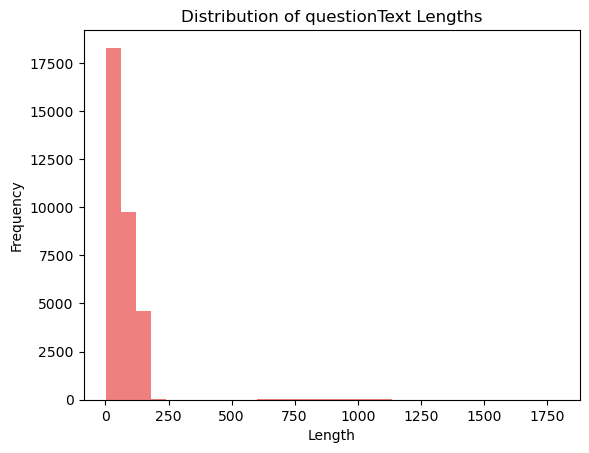

In [22]:
# Sample code for univariate analysis
df['questionText_length'] = df['questionText'].apply(len)
plt.hist(df['questionText_length'], bins=30, color='lightcoral')
plt.title('Distribution of questionText Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


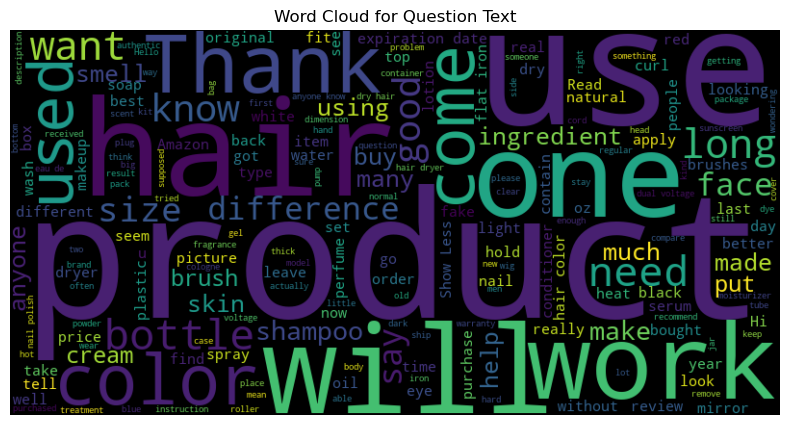

In [23]:
# Sample code for word cloud in univariate analysis
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['questionText'])
wordcloud = WordCloud(width=800, height=400, random_state=42).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Question Text')
plt.show()


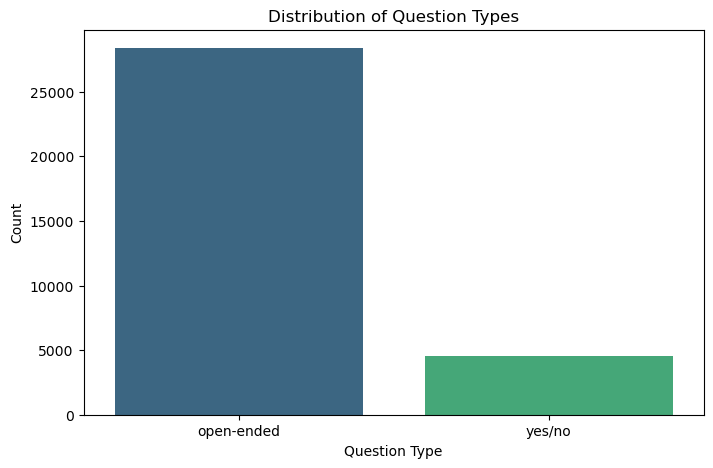

In [24]:
# Bar Chart for 'questionType' distribution
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='questionType', palette='viridis')
plt.title('Distribution of Question Types')
plt.xlabel('Question Type')
plt.ylabel('Count')
plt.show()


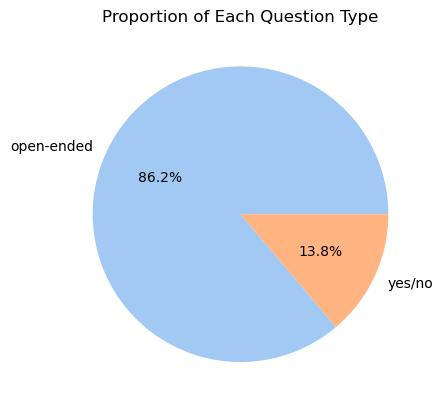

In [25]:
# Pie Chart for 'questionType' proportions
question_type_counts = df['questionType'].value_counts()
plt.pie(question_type_counts, labels=question_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Each Question Type')
plt.show()


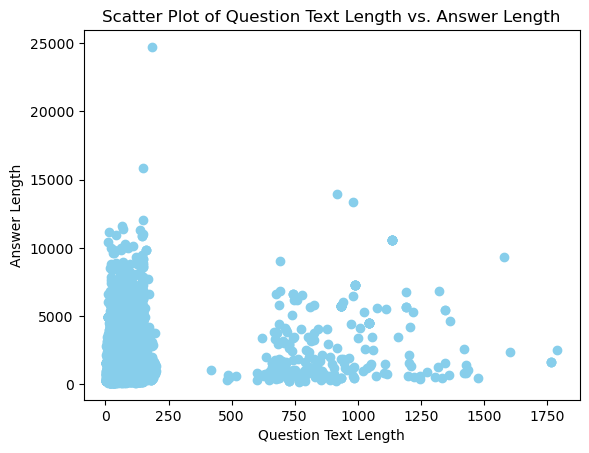

In [26]:
# Scatter Plot for 'questionText_length' and 'answer_length'
df['answer_length'] = df['answers'].apply(lambda x: len(str(x)))
plt.scatter(df['questionText_length'], df['answer_length'], color='skyblue')
plt.title('Scatter Plot of Question Text Length vs. Answer Length')
plt.xlabel('Question Text Length')
plt.ylabel('Answer Length')
plt.show()


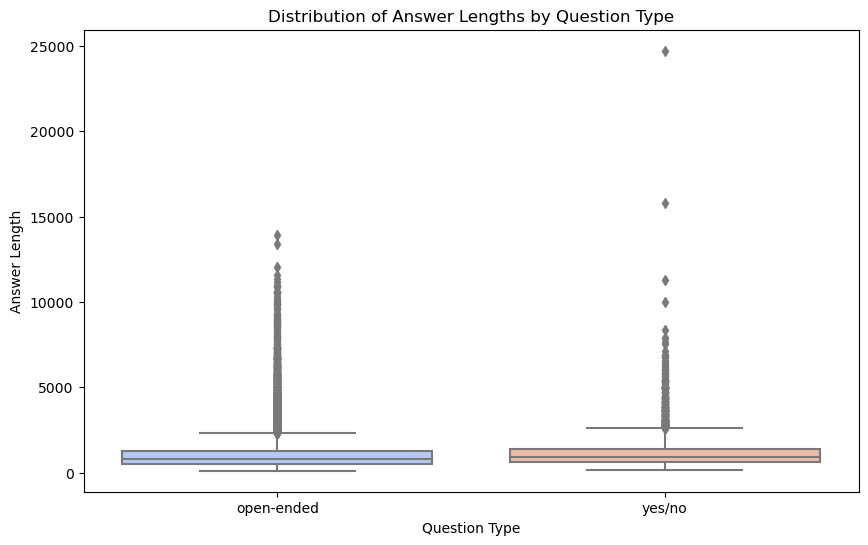

In [27]:
# Box Plot for 'questionType' and 'answer_length'
plt.figure(figsize=(10, 6))
sns.boxplot(x='questionType', y='answer_length', data=df, palette='coolwarm')
plt.title('Distribution of Answer Lengths by Question Type')
plt.xlabel('Question Type')
plt.ylabel('Answer Length')
plt.show()


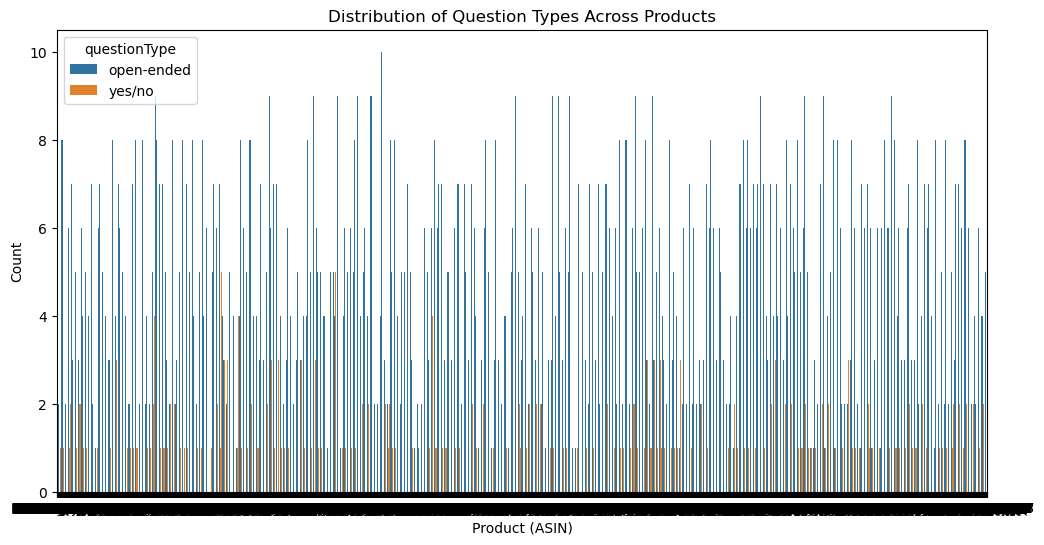

In [28]:
# Bar Chart for 'asin' and 'questionType'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='asin', hue='questionType')
plt.title('Distribution of Question Types Across Products')
plt.xlabel('Product (ASIN)')
plt.ylabel('Count')
plt.show()


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


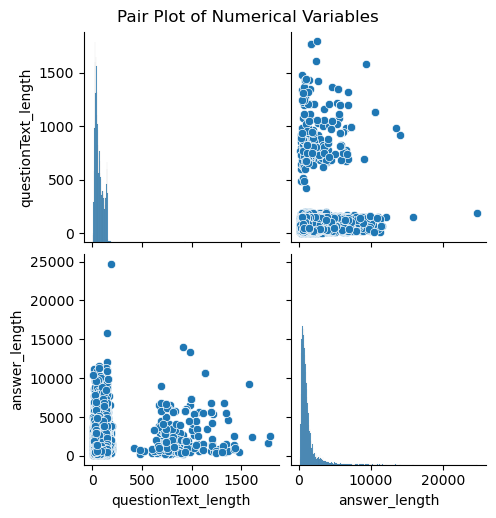

In [29]:
# Pair Plot for Numerical Variables
numerical_variables = ['questionText_length', 'answer_length']
sns.pairplot(df[numerical_variables])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


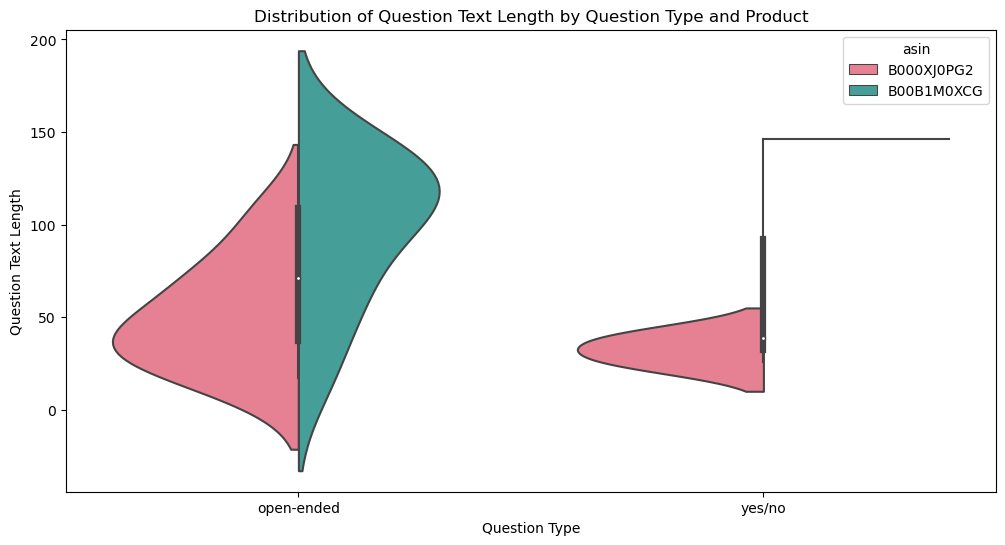

In [30]:
# Example: Using 'split' with two levels of 'hue'
two_levels_asin = df[df['asin'].isin(df['asin'].value_counts().index[:2])]
plt.figure(figsize=(12, 6))
sns.violinplot(x='questionType', y='questionText_length', hue='asin', data=two_levels_asin, split=True, palette='husl')
plt.title('Distribution of Question Text Length by Question Type and Product')
plt.xlabel('Question Type')
plt.ylabel('Question Text Length')
plt.show()


<Figure size 800x600 with 0 Axes>

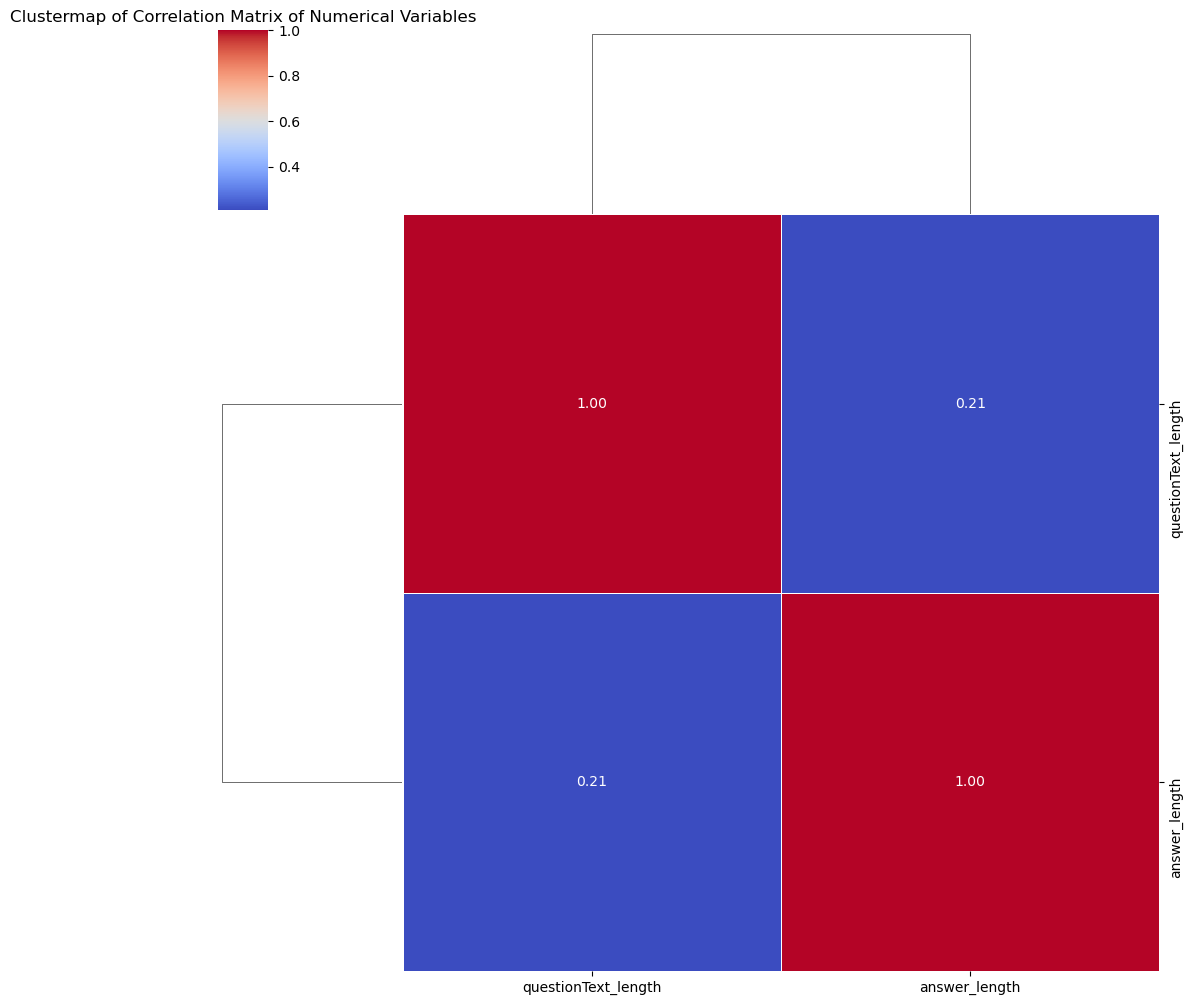

In [31]:
# Clustermap for Correlation Matrix of Numerical Variables
numerical_variables = ['questionText_length', 'answer_length']
correlation_matrix = df[numerical_variables].corr()

plt.figure(figsize=(8, 6))
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Clustermap of Correlation Matrix of Numerical Variables')
plt.show()


In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization function
def tokenize_text(text):
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token.lower() for token in tokens if token.isalnum() and token.lower() not in stop_words]
    return tokens

# Convert dictionaries in 'answers' column to strings
df['answers'] = df['answers'].apply(lambda answers: [answer.get('answerText', '') for answer in answers])

# Tokenize "questionText" and "answers" columns
df['tokenized_question'] = df['questionText'].apply(tokenize_text)
df['tokenized_answers'] = df['answers'].apply(lambda answers: [tokenize_text(answer) for answer in answers])

# Display the resulting DataFrame
print(df[['tokenized_question', 'tokenized_answers']])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                      tokenized_question  \
0           [may, request, manual, instruction, product]   
1                       [problems, heater, melting, wax]   
2      [much, wax, pounds, instance, take, fill, heater]   
3                         [know, expired, date, product]   
4      [sun, work, inside, new, moisturizers, start, ...   
...                                                  ...   
32931                [argan, oil, pure, 100, good, skin]   
32932  [find, rough, cuticles, right, around, nail, u...   
32933                               [good, nail, beauty]   
32934                     [use, topical, use, dry, hair]   
32935                 [use, deep, conditioning, session]   

                                       tokenized_answers  
0      [[homedics, complete, list, instruction, manua...  
1      [[leave, unit, time, always, ready, always, st...  
2      [[came, proper, amount, wax, think, remember, ...  
3      [[expiration, date, bottom, plastic,

In [10]:
# Specify the index of the row you want to check
row_index_to_check = 0

# Access the tokenized question and answers for the specified row
tokenized_question = df.at[row_index_to_check, 'tokenized_question']
tokenized_answers = df.at[row_index_to_check, 'tokenized_answers']

# Display the tokenized text
print(f'Tokenized Question: {tokenized_question}')
print(f'Tokenized Answers: {tokenized_answers}')


Tokenized Question: ['may', 'request', 'manual', 'instruction', 'product']
Tokenized Answers: [['homedics', 'complete', 'list', 'instruction', 'manuals', 'website', 'http', 'look', 'model', 'number', 'listed', 'unit', 'select', 'appropriate', 'instruction', 'manual', 'model', 'download', 'pdf', 'format'], ['link', 'adobe', 'acrobat', 'pdf', 'format', 'http']]


In [11]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download NLTK resources for sentiment analysis
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for questions and answers
df['question_sentiment'] = df['tokenized_question'].apply(lambda x: sia.polarity_scores(' '.join(x))['compound'])
df['answer_sentiment'] = df['tokenized_answers'].apply(lambda x: [sia.polarity_scores(' '.join(answer))['compound'] for answer in x])

# Display the resulting DataFrame
print(df[['tokenized_question', 'question_sentiment', 'tokenized_answers', 'answer_sentiment']])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                      tokenized_question  question_sentiment  \
0           [may, request, manual, instruction, product]              0.0000   
1                       [problems, heater, melting, wax]             -0.4019   
2      [much, wax, pounds, instance, take, fill, heater]              0.0000   
3                         [know, expired, date, product]              0.0000   
4      [sun, work, inside, new, moisturizers, start, ...              0.0000   
...                                                  ...                 ...   
32931                [argan, oil, pure, 100, good, skin]              0.4404   
32932  [find, rough, cuticles, right, around, nail, u...              0.0000   
32933                               [good, nail, beauty]              0.7717   
32934                     [use, topical, use, dry, hair]              0.0000   
32935                 [use, deep, conditioning, session]              0.0000   

                                       

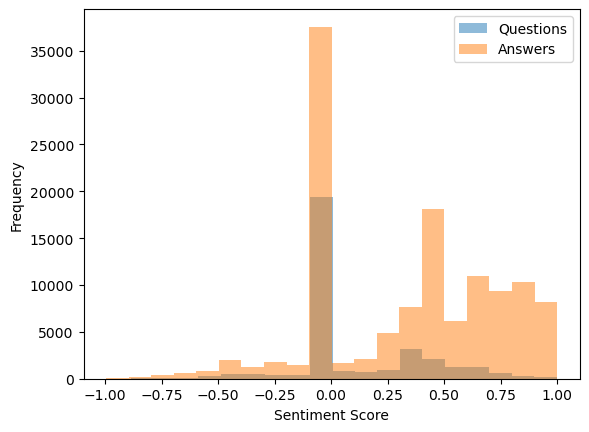

In [12]:
import matplotlib.pyplot as plt

# Plot distribution of question sentiment scores
plt.hist(df['question_sentiment'], bins=20, label='Questions', alpha=0.5)

# Plot distribution of answer sentiment scores (combine scores for all answers in each row)
all_answer_sentiments = [score for scores in df['answer_sentiment'] for score in scores]
plt.hist(all_answer_sentiments, bins=20, label='Answers', alpha=0.5)

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [13]:
# Compare mean sentiment scores for questions and answers
mean_question_sentiment = df['question_sentiment'].mean()
mean_answer_sentiment = df['answer_sentiment'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0).mean()

print(f'Mean Question Sentiment: {mean_question_sentiment}')
print(f'Mean Answer Sentiment: {mean_answer_sentiment}')


Mean Question Sentiment: 0.12373497085256255
Mean Answer Sentiment: 0.33705158344128683


In [14]:
# Calculate correlation between sentiment scores and other features
correlation_question_length = df['tokenized_question'].apply(lambda x: len(x)).corr(df['question_sentiment'])
correlation_answer_length = df['tokenized_answers'].apply(lambda x: sum(len(answer) for answer in x) / len(x) if len(x) > 0 else 0).corr(df['answer_sentiment'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0))

print(f'Correlation between Question Length and Sentiment: {correlation_question_length}')
print(f'Correlation between Answer Length and Sentiment: {correlation_answer_length}')


Correlation between Question Length and Sentiment: 0.25610477001398557
Correlation between Answer Length and Sentiment: 0.3133818512382732


# for the filtered answers 

In [15]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Tokenize "questionText" and "filtered_answers" columns
df['tokenized_question'] = df['questionText'].apply(lambda x: [token.text for token in nlp(x)])
df['tokenized_filtered_answers'] = df['filtered_answers'].apply(lambda answers: [token.text for answer in answers for token in nlp(answer.get('answerText', ''))])

# Display the resulting DataFrame
print(df[['tokenized_question', 'tokenized_filtered_answers']])


                                      tokenized_question  \
0      [May, I, request, for, a, manual, instruction,...   
1      [Having, problems, with, the, heater, melting,...   
2      [How, much, wax, (, in, pounds, ,, for, instan...   
3      [How, to, know, the, expired, date, of, this, ...   
4      [I, am, not, in, the, sun, as, I, work, inside...   
...                                                  ...   
32931  [is, Argan, Oil, Pure, 100, %, good, for, Skin...   
32932  [I, find, myself, with, rough, cuticles, right...   
32933               [is, it, good, for, nail, beauty, ?]   
32934  [how, can, i, use, it, for, Topical, Use, on, ...   
32935  [how, can, i, use, it, for, Deep, Conditioning...   

                              tokenized_filtered_answers  
0                                                     []  
1                                                     []  
2      [It, came, with, the, proper, amount, of, wax,...  
3                                          

In [17]:
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')

# Tokenization function
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Tokenize "questionText" and "filtered_answers" columns
df['tokenized_question'] = df['questionText'].apply(tokenize_text)
df['tokenized_filtered_answers'] = df['filtered_answers'].apply(lambda answers: [tokenize_text(answer.get('answerText', '')) for answer in answers])

# Display the resulting DataFrame
print(df[['tokenized_question', 'tokenized_filtered_answers']])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                      tokenized_question  \
0      [May, I, request, for, a, manual, instruction,...   
1      [Having, problems, with, the, heater, melting,...   
2      [How, much, wax, (, in, pounds, ,, for, instan...   
3      [How, to, know, the, expired, date, of, this, ...   
4      [I, am, not, in, the, sun, as, I, work, inside...   
...                                                  ...   
32931  [is, Argan, Oil, Pure, 100, %, good, for, Skin...   
32932  [I, find, myself, with, rough, cuticles, right...   
32933               [is, it, good, for, nail, beauty, ?]   
32934  [how, can, i, use, it, for, Topical, Use, on, ...   
32935  [how, can, i, use, it, for, Deep, Conditioning...   

                              tokenized_filtered_answers  
0                                                     []  
1                                                     []  
2      [[It, came, with, the, proper, amount, of, wax...  
3                                          